<a href="https://colab.research.google.com/github/Yalla-Krishnaveni/Disaster_Prediction/blob/main/Disaster_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
data="/content/drive/MyDrive/project.csv"
import numpy as np
import pandas as pd
from numpy import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn import preprocessing  
import seaborn as sns
%matplotlib inline
 
data=pd.read_csv(data)#dataframe-2D

In [27]:
data.head()

,Year,Disasterg,Disasters,Disastert,Dist,Startm,Startd,Endm,Endd,Mortality(number),Total damage
0,2014,1,1,1,1,6,9,9,9,4,"i)Crops in 11,777 hectares ii)damage to 963 ho..."
1,2014,1,1,1,20,10,27,10,27,0,"Damage to paddy,cotton crops"
2,2014,1,1,1,11,6,9,7,9,1,"i)Crops in 8,345hectares"
3,2014,1,1,1,10,6,9,9,9,1,i)Crops in 3000 hectares ii)damage to 345 houses
4,2014,1,1,1,32,6,9,9,9,2,i)Crops in 7000 hectares ii)damage to 234 houses


In [28]:
data[20:30]

,Year,Disasterg,Disasters,Disastert,Dist,Startm,Startd,Endm,Endd,Mortality(number),Total damage
20,2015,1,2,3,26,4,10,11,24,0,"Damage to crops,decrease in ground water level"
21,2015,1,2,3,32,4,10,11,24,0,"Damage to crops,decrease in ground water level"
22,2015,2,3,4,4,5,21,5,21,2,30 people injured
23,2016,1,1,1,33,1,9,10,30,49,"Damage to paddy,cotton crops"
24,2016,1,1,1,10,2,3,2,3,0,"Damage of 2585 ,254,350 hectares of maize,Bana..."
25,2016,1,1,1,4,9,31,9,31,7,i)Innudation of low lying areas ii)Damage of t...
26,2016,1,1,1,4,1,9,10,30,49,"Damage to paddy,cotton crops"
27,2016,1,1,1,11,2,3,2,3,0,"Damage of 1020,154,150 hectares of maize,Banan..."
28,2016,1,1,1,23,2,3,2,3,0,"Damage of 1000 ,223,230 hectares of maize,Bana..."
29,2016,1,1,1,32,2,3,2,3,0,"Damage of 2345 ,223,130 hectares of maize,Bana..."


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               60 non-null     int64 
 1   Disasterg          60 non-null     int64 
 2   Disasters          60 non-null     int64 
 3   Disastert          60 non-null     int64 
 4   Dist               60 non-null     int64 
 5   Startm             60 non-null     int64 
 6   Startd             60 non-null     int64 
 7   Endm               60 non-null     int64 
 8   Endd               60 non-null     int64 
 9   Mortality(number)  60 non-null     int64 
 10  Total damage       60 non-null     object
dtypes: int64(10), object(1)
memory usage: 5.3+ KB


In [30]:
data.isnull().sum()

Year                 0
Disasterg            0
Disasters            0
Disastert            0
Dist                 0
Startm               0
Startd               0
Endm                 0
Endd                 0
Mortality(number)    0
Total damage         0
dtype: int64

In [31]:
data=data.dropna()

In [32]:
data.isnull().sum().sum()

0

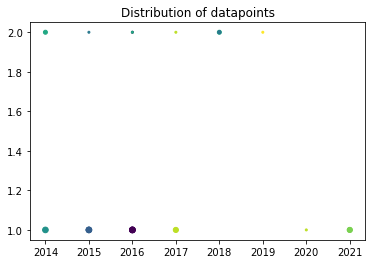

In [35]:
plt.scatter(data.Year,data.Disasterg,data.Dist,data.Startm)
plt.title("Distribution of datapoints")
plt.show()

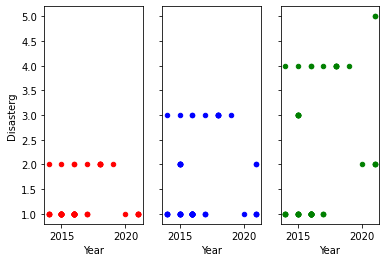

In [36]:
fig,axs=plt.subplots(1,3,sharey=True)
data.plot(kind="scatter",x='Year',y='Disasterg',ax=axs[0],color='red')
data.plot(kind="scatter",x='Year',y='Disasters',ax=axs[1],color='blue')
data.plot(kind="scatter",x='Year',y='Disastert',ax=axs[2],color='green')

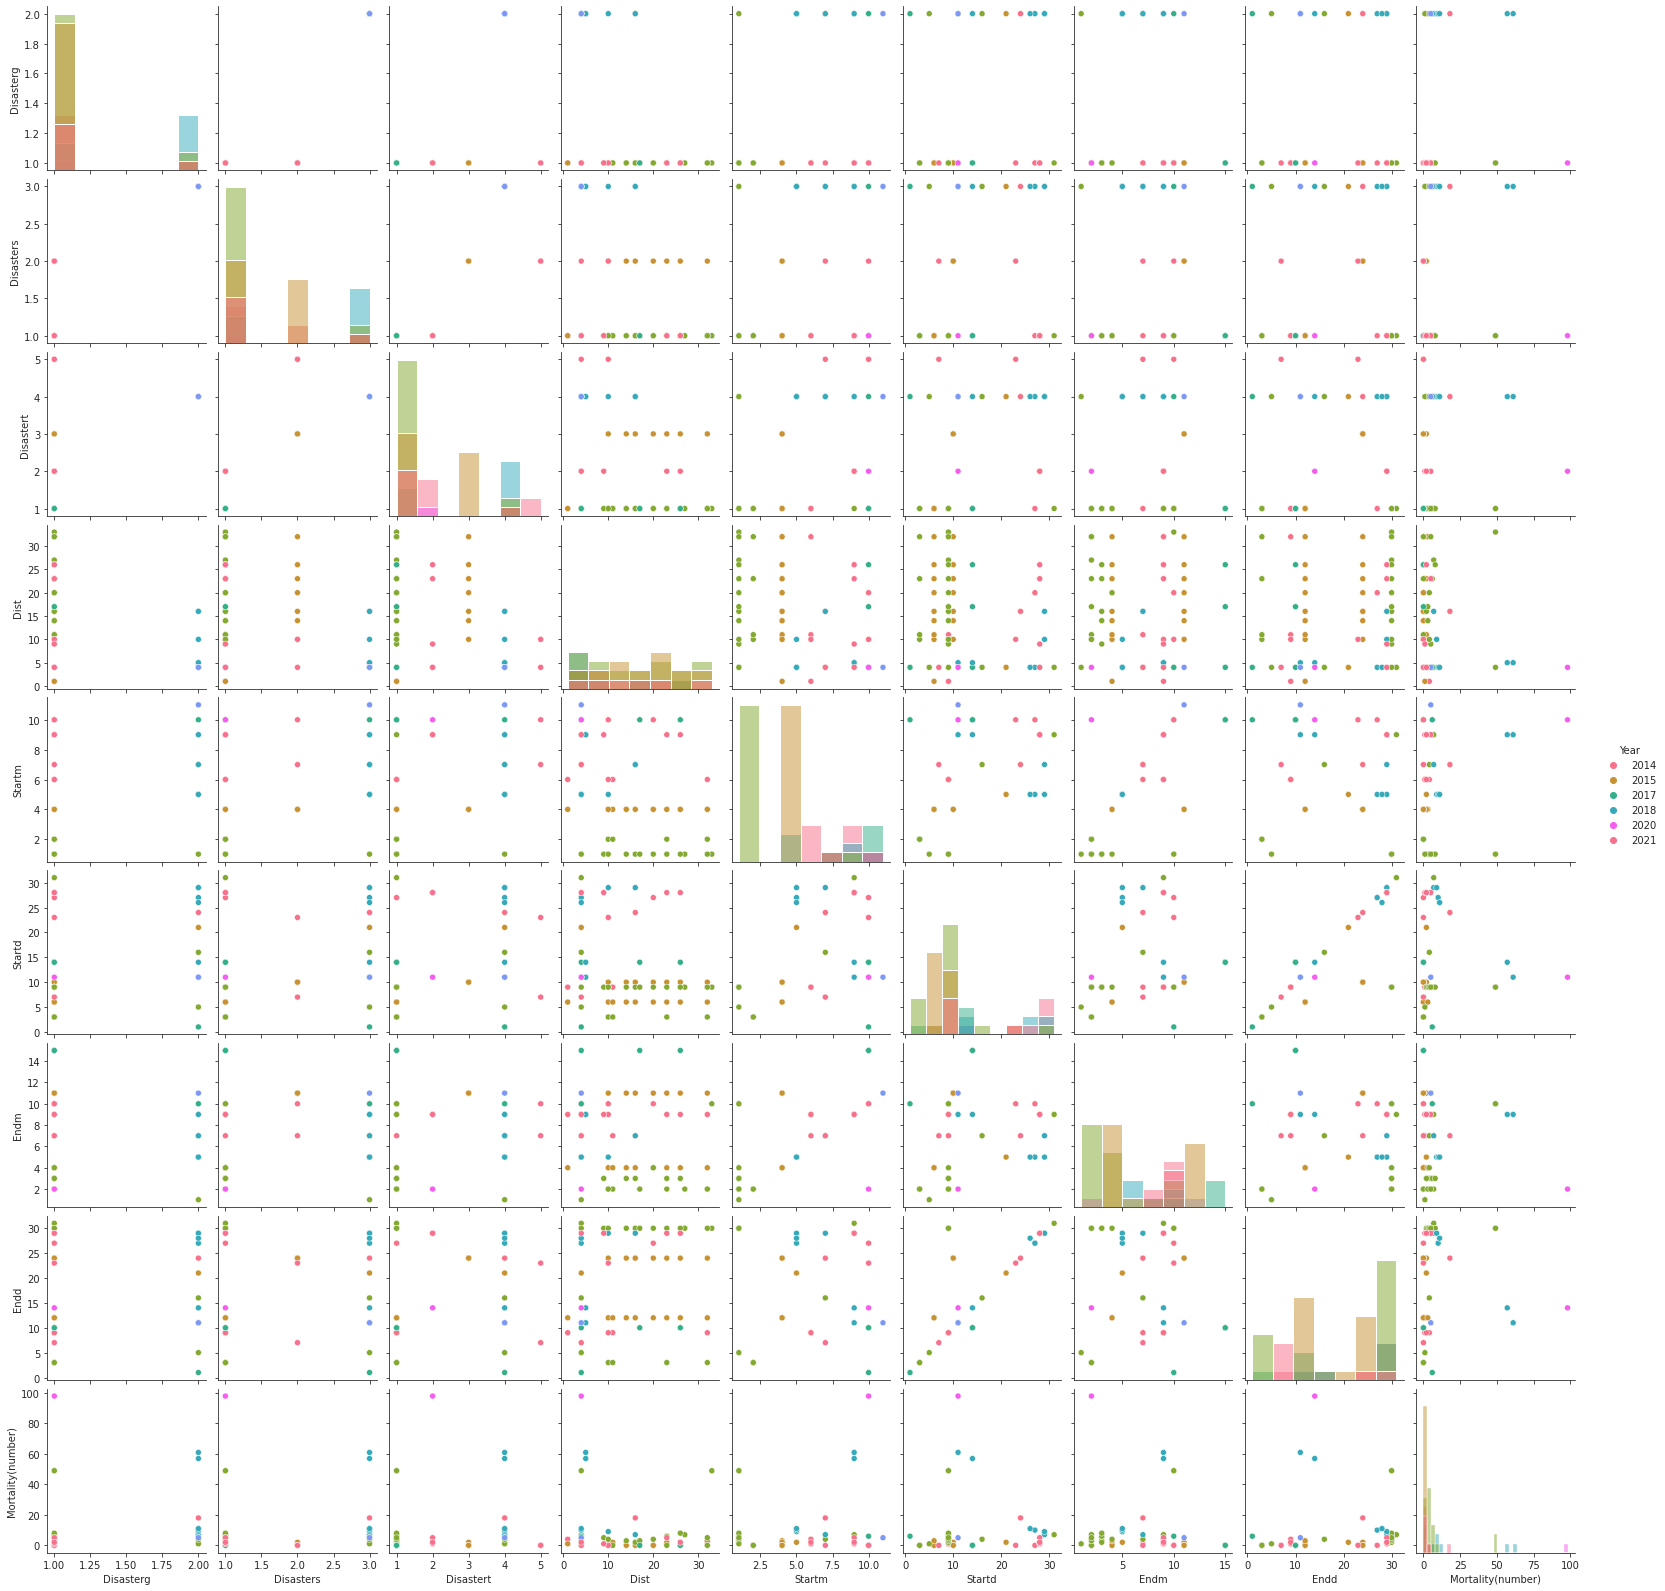

In [37]:
sns.set_style("ticks")
sns.pairplot(data,hue='Year',diag_kind="hist",kind="scatter",palette="husl")
plt.show()

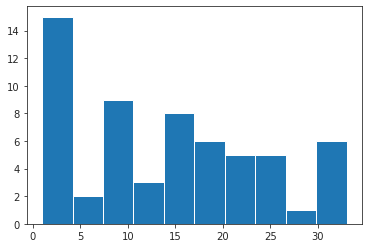

In [38]:
# creating a histogram
plt.hist(data['Dist'])
plt.show()

In [41]:
x = np.array(data[['Year','Disasterg','Disastert','Dist','Startm']]) # independent variables
y = np.array(data[['Mortality(number)']]) # dependent variable

In [42]:
x

array([[2014,    1,    1,    1,    6],
       [2014,    1,    1,   20,   10],
       [2014,    1,    1,   11,    6],
       [2014,    1,    1,   10,    6],
       [2014,    1,    1,   32,    6],
       [2014,    2,    4,   16,    7],
       [2015,    1,    1,    1,    4],
       [2015,    1,    1,   10,    4],
       [2015,    1,    1,   11,    4],
       [2015,    1,    1,   14,    4],
       [2015,    1,    1,   16,    4],
       [2015,    1,    1,   20,    4],
       [2015,    1,    1,   23,    4],
       [2015,    1,    1,   26,    4],
       [2015,    1,    1,   32,    4],
       [2015,    1,    3,   14,    4],
       [2015,    1,    3,   16,    4],
       [2015,    1,    3,   23,    4],
       [2015,    1,    3,   10,    4],
       [2015,    1,    3,   20,    4],
       [2015,    1,    3,   26,    4],
       [2015,    1,    3,   32,    4],
       [2015,    2,    4,    4,    5],
       [2016,    1,    1,   33,    1],
       [2016,    1,    1,   10,    2],
       [2016,    1,    1,

In [43]:
y

array([[ 4],
       [ 0],
       [ 1],
       [ 1],
       [ 2],
       [18],
       [ 1],
       [ 1],
       [ 2],
       [ 0],
       [ 0],
       [ 0],
       [ 1],
       [ 0],
       [ 3],
       [ 0],
       [ 0],
       [ 2],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 2],
       [49],
       [ 0],
       [ 7],
       [49],
       [ 0],
       [ 0],
       [ 0],
       [ 5],
       [ 4],
       [ 3],
       [ 2],
       [ 3],
       [ 4],
       [ 6],
       [ 7],
       [ 8],
       [ 5],
       [ 1],
       [ 4],
       [ 0],
       [ 0],
       [ 0],
       [ 6],
       [57],
       [61],
       [ 7],
       [ 9],
       [10],
       [11],
       [ 5],
       [98],
       [ 5],
       [ 0],
       [ 0],
       [ 1],
       [ 2],
       [ 2]])

In [66]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [67]:
print(x_train.shape) # check the shape of training set
print(x_test.shape) 

(42, 5)
(18, 5)


In [68]:
print(y_train.shape) # check the shape of training set
print(y_test.shape)

(42, 1)
(18, 1)


DECISION TREE

In [87]:
from sklearn.tree import DecisionTreeClassifier
regressor=DecisionTreeClassifier()
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)
print("Predicted value for training data:",regressor.score(x_train,y_train)*100)
print("Predicted value for testing data:",regressor.score(x_test,y_test)*100)
accuracy=regressor.score(x,y)*100
print(accuracy)

Predicted value for training data: 97.61904761904762
Predicted value for testing data: 33.33333333333333
78.33333333333333


RANDOM FOREST

In [88]:
from sklearn.ensemble import RandomForestClassifier
regressor1=RandomForestClassifier()
regressor1.fit(x_train,y_train)
y_pred=regressor1.predict(x_test)
print("Predicted value for training data:",regressor1.score(x_train,y_train)*100)
print("Predicted value for testing data:",regressor1.score(x_test,y_test)*100)
accuracy=regressor1.score(x,y)*100
print(accuracy)

Predicted value for training data: 97.61904761904762
Predicted value for testing data: 22.22222222222222
75.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


LOGISTIC REGRESSION

In [89]:
from sklearn.linear_model import LogisticRegression
regressor2=LogisticRegression()
regressor2.fit(x_train,y_train)
y_pred=regressor2.predict(x_test)
print("Predicted value for training data:",regressor2.score(x_train,y_train)*100)
print("Predicted value for testing data:",regressor2.score(x_test,y_test)*100)
accuracy=regressor2.score(x,y)*100
print(accuracy)

Predicted value for training data: 40.476190476190474
Predicted value for testing data: 27.77777777777778
36.666666666666664


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


KNN

In [90]:
from sklearn.neighbors import KNeighborsClassifier
regressor3=KNeighborsClassifier()
regressor3.fit(x_train,y_train)
y_pred=regressor3.predict(x_test)
print("Predicted value for training data:",regressor3.score(x_train,y_train)*100)
print("Predicted value for testing data:",regressor3.score(x_test,y_test)*100)
accuracy=regressor3.score(x,y)*100
print(accuracy)

Predicted value for training data: 45.23809523809524
Predicted value for testing data: 22.22222222222222
38.333333333333336


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


SVM

In [91]:
from sklearn.svm import SVC
regressor4=SVC()
regressor4.fit(x_train,y_train)
y_pred=regressor4.predict(x_test)
print("Predicted value for training data:",regressor4.score(x_train,y_train)*100)
print("Predicted value for testing data:",regressor4.score(x_test,y_test)*100)
accuracy=regressor4.score(x,y)*100
print(accuracy)

Predicted value for training data: 35.714285714285715
Predicted value for testing data: 27.77777777777778
33.33333333333333


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GAUSSIAN NB

In [94]:
from sklearn.naive_bayes import MultinomialNB
regressor5=MultinomialNB()
regressor5.fit(x_train,y_train)
y_pred=regressor5.predict(x_test)
print("Predicted value for training data:",regressor5.score(x_train,y_train)*100)
print("Predicted value for testing data:",regressor5.score(x_test,y_test)*100)
accuracy=regressor5.score(x,y)*100
print(accuracy)

Predicted value for training data: 33.33333333333333
Predicted value for testing data: 22.22222222222222
30.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [98]:
from sklearn.linear_model import LinearRegression
regressor6=LinearRegression()
regressor6.fit(x_train,y_train)
y_pred=regressor6.predict(x_test)
print("Predicted value for training data:",regressor6.score(x_train,y_train)*100)
print("Predicted value for testing data:",regressor6.score(x_test,y_test)*100)
accuracy=regressor6.score(x,y)*100
print(accuracy)

Predicted value for training data: 12.580888388889866
Predicted value for testing data: -2.4674090973779927
4.940046620720773


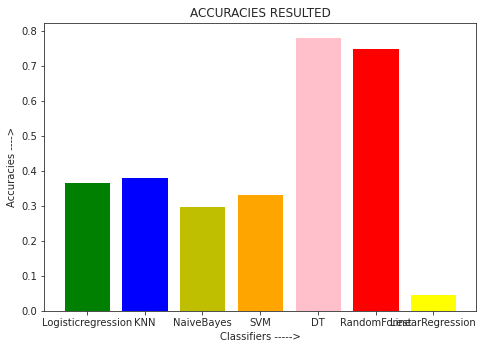

In [100]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
algo = ['Logisticregression','KNN','NaiveBayes','SVM','DT','RandomForest','LinearRegression']
accuracy = [regressor2.score(x,y),regressor3.score(x,y),regressor5.score(x,y),regressor4.score(x,y),regressor.score(x,y),regressor1.score(x,y),regressor6.score(x,y)]
ax.bar(algo[0],accuracy[0],color = 'g')
ax.bar(algo[1],accuracy[1],color = 'b')
ax.bar(algo[2],accuracy[2],color = 'y')
ax.bar(algo[3],accuracy[3],color = 'orange')
ax.bar(algo[4],accuracy[4],color = 'pink')
ax.bar(algo[5],accuracy[5],color = 'r')
ax.bar(algo[6],accuracy[6],color = 'yellow')
plt.xlabel('Classifiers ----->')
plt.ylabel('Accuracies ---->')
plt.title('ACCURACIES RESULTED')
plt.show()